In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import numpy as np
import matplotlib.cm as cm
from matplotlib.ticker import MultipleLocator
from pathlib import Path

method_path = "figs/QSSA/SIM_results/"
mechanism_name = "Otomo_32s213r"

case_name = "case_NH3_counterflow_KAUST"

color_arr = ('k','r','b','y','g', 'c','m')
symbol_arr = ('s','o','v','^','*')
# ─── Use generic serif font ───────────────────────────────────────────────────
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.size"]   = 7
plt.rcParams["axes.linewidth"] = 0.3   # thinner borders
plt.rcParams["xtick.major.width"] = 0.3
plt.rcParams["ytick.major.width"] = 0.3
plt.rcParams["xtick.minor.width"] = 0.2
plt.rcParams["ytick.minor.width"] = 0.2



yt : [INFO     ] 2025-07-19 10:58:09,210 Parameters: current_time              = 0.04025760062073119
yt : [INFO     ] 2025-07-19 10:58:09,211 Parameters: domain_dimensions         = [1024 1024    1]
yt : [INFO     ] 2025-07-19 10:58:09,212 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-07-19 10:58:09,212 Parameters: domain_right_edge         = [0.05 0.05 1.  ]


Squeezed temp shape: (1024, 1024)
temp range: 297.99999999662856 → 1672.0988897075028
Saved figure to figs/DNS/temperature_level0_jet.png


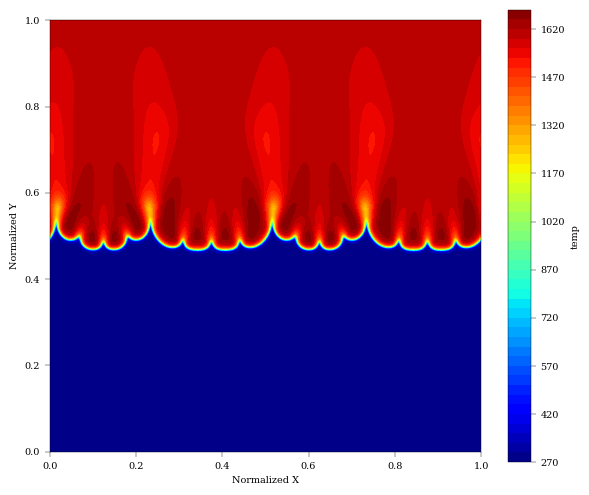

In [2]:
import yt
import numpy as np
import matplotlib.pyplot as plt

# ───── 1) Load your AMReX plotfile ─────────────────────────
# ds = yt.load("/data/ZhuXu/Cantera/NeuralRecon/SIM_results/DNS_dataset/test_plt15300")

# ds = yt.load("/data/ZhuXu/Cantera/NeuralRecon/SIM_results/DNS_dataset/NH3/plt08800")
# DNS_path = "/data/ZhuXu/Cantera/NeuralRecon/SIM_results/DNS_dataset/NH3/plt17000"

DNS_path = "/data/ZhuXu/Cantera/NeuralRecon/SIM_results/DNS_dataset/NH3/plt12000"


ds = yt.load(DNS_path)


# ───── 2) Build a covering grid at level 0 ─────────────────
left_edge = ds.domain_left_edge
dims      = ds.domain_dimensions   # [Nx, Ny] for 2D

cg = ds.covering_grid(level=0, left_edge=left_edge, dims=dims)

target_value = "temp"
# target_value = "Y(OH)"

# ───── 3) Extract & squeeze the temperature array ──────────
T_raw = cg[target_value].v     # could be shape (1,Ny,Nx) or (Ny,Nx)
T = np.squeeze(T_raw)    # now guaranteed 2D
if T.ndim != 2:
    raise ValueError(f"Expected 2D temp array after squeezing, got shape {T.shape}")

Ny, Nx = T.shape
print(f"Squeezed temp shape: {T.shape}")

# ───── 4) Create a unit-square mesh ────────────────────────
x = np.linspace(0, 1, Nx)
y = np.linspace(0, 1, Ny)
X, Y = np.meshgrid(x, y)

# ───── 5) Quick sanity check ───────────────────────────────
print("temp range:", T.min(), "→", T.max())

# ───── 6) Plot & save ──────────────────────────────────────
plt.figure(figsize=(6,5))
cf = plt.contourf(Y, X, T, levels=50, cmap='jet')
plt.xlabel("Normalized X")
plt.ylabel("Normalized Y")
plt.colorbar(cf, label=target_value)
plt.gca().set_aspect("equal", "box")
plt.tight_layout()

# Save to PNG
plt.savefig("figs/DNS/temperature_level0_jet.png", dpi=300)
print("Saved figure to figs/DNS/temperature_level0_jet.png")

plt.show()

Exported 551040 points to /data/ZhuXu/Cantera/NeuralRecon/SIM_results/DNS_dataset/NH3/plt12000/Otomo_32s213r/DNS_reduced_data.csv
Saved reduced-contour plot to contour_reduced_Y_OH.png


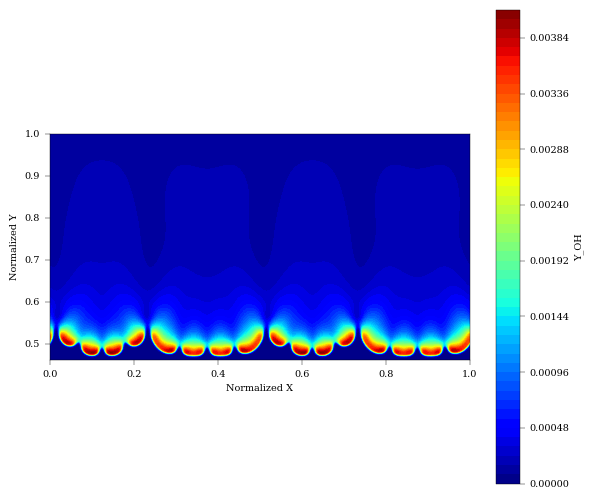

In [ ]:
import yt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# ───── 2) Build a covering grid at level 0 ─────────────────
left_edge = ds.domain_left_edge
dims      = ds.domain_dimensions   # [Nx, Ny] for 2D
cg = ds.covering_grid(level=0, left_edge=left_edge, dims=dims)

# ───── 3) Create normalized coordinates ────────────────────
Nx, Ny = int(dims[0]), int(dims[1])
x = np.linspace(0, 1, Nx)
y = np.linspace(0, 1, Ny)
X, Y = np.meshgrid(x, y)   # shapes: (Ny, Nx)

# ───── 4) List of fields to export ────────────────────────
fields = [
    "x_velocity",
    "y_velocity",
    "density",
    "rhoh",
    "temp",
    "RhoRT",
    "divu",
    "gradpx",
    "gradpy",
    "I_R(NO)",
    "I_R(NH3)",
    "I_R(H2)",
    "I_R(O2)",
    "I_R(H)",
    "I_R(O)",
    "I_R(OH)",
    "I_R(HO2)",
    "I_R(N2)",
    "I_R(H2O)",
    "I_R(H2O2)",
    "I_R(NH2)",
    "I_R(NH)",
    "I_R(N)",
    "I_R(NNH)",
    "I_R(NH2OH)",
    "I_R(H2NO)",
    "I_R(HNOH)",
    "I_R(HNO)",
    "I_R(HON)",
    "I_R(NO2)",
    "I_R(HONO)",
    "I_R(HNO2)",
    "I_R(NO3)",
    "I_R(HONO2)",
    "I_R(N2O)",
    "I_R(N2H4)",
    "I_R(N2H3)",
    "I_R(N2H2)",
    "I_R(H2NN)",
    "I_R(AR)",
    "FunctCall",
    "HeatRelease",
    "avg_pressure",
    "mag_vort",
    "Y(NO)",
    "Y(NH3)",
    "Y(H2)",
    "Y(O2)",
    "Y(H)",
    "Y(O)",
    "Y(OH)",
    "Y(HO2)",
    "Y(N2)",
    "Y(H2O)",
    "Y(H2O2)",
    "Y(NH2)",
    "Y(NH)",
    "Y(N)",
    "Y(NNH)",
    "Y(NH2OH)",
    "Y(H2NO)",
    "Y(HNOH)",
    "Y(HNO)",
    "Y(HON)",
    "Y(NO2)",
    "Y(HONO)",
    "Y(HNO2)",
    "Y(NO3)",
    "Y(HONO2)",
    "Y(N2O)",
    "Y(N2H4)",
    "Y(N2H3)",
    "Y(N2H2)",
    "Y(H2NN)",
    "Y(AR)",
    "mixture_fraction",
    "progress_variable"
]

# ───── 5) Extract & flatten into DataFrame ───────────────
data = {
    "Normalized X": X.flatten(),
    "Normalized Y": Y.flatten()
}

for field in fields:
    arr = np.squeeze(cg[field].v)
    if arr.shape != (Ny, Nx):
        raise ValueError(f"Field {field!r} has shape {arr.shape}, expected ({Ny},{Nx})")
    data[field] = arr.flatten()

df = pd.DataFrame(data)

# ───── 5b) Build a renaming dictionary and apply it ───────
rename_map = {}

# ❶ Generic rules for species names
for col in df.columns:
    if col.startswith("Y(") and col.endswith(")"):
        # Y(NO)  →  Y_NO
        species = col[2:-1]
        rename_map[col] = f"Y_{species}"
    elif col.startswith("I_R(") and col.endswith(")"):
        # I_R(NO)  →  IR_NO
        species = col[4:-1]
        rename_map[col] = f"IR_{species}"

# ❷ Optional human-friendly shorthands for flow variables
rename_map.update({
    "temp":              "T",
    "HeatRelease":       "HRR",
    # add more if you like …
})

# ❸ Apply to the dataframe
df.rename(columns=rename_map, inplace=True)
# ───── 5c) Filter to only rows where Y(OH) > 1e-9 ─────────
df_reduced = df[df["Y_OH"] > 1e-8].reset_index(drop=True)

# root folder that should hold every reduced CSV
dns_dir = Path(DNS_path) / mechanism_name
dns_dir.mkdir(parents=True, exist_ok=True)   # ← makes the folder if missing

# root folder that should hold every reduced CSV
dns_dir = Path(DNS_path) / mechanism_name
dns_dir.mkdir(parents=True, exist_ok=True)   # ← makes the folder if missing

# full file‐name inside that folder
csv_path = dns_dir / "DNS_reduced_data.csv"

df_reduced.to_csv(csv_path, index=False)
print(f"Exported {len(df_reduced)} points to {csv_path}")


# ───── 6) Read reduced CSV and re‐plot a contour ──────────
df2 = pd.read_csv(csv_path)

# choose which field to contour:
target = "Y_OH"  # or switch to "Y_N2" / "Y_H2" etc.

# rebuild grid from reduced data
xs = np.sort(df2["Normalized X"].unique())
ys = np.sort(df2["Normalized Y"].unique())
Xg, Yg = np.meshgrid(xs, ys)

# reshape and fill missing with 0 instead of NaN
Z = df2.pivot_table(
    index="Normalized Y",
    columns="Normalized X",
    values=target,
    fill_value=0
).values

plt.figure(figsize=(6,5))
cf = plt.contourf(Yg, Xg, Z, levels=50, cmap="jet")
plt.xlabel("Normalized X")
plt.ylabel("Normalized Y")
plt.colorbar(cf, label=target)
plt.gca().set_aspect("equal", "box")
plt.tight_layout()

outname = f"contour_reduced_{target}.png"
plt.savefig(outname, dpi=300)
print(f"Saved reduced-contour plot to {outname}")
plt.show()

Saved reduced-contour plot to contour_reduced_Y_OH.png


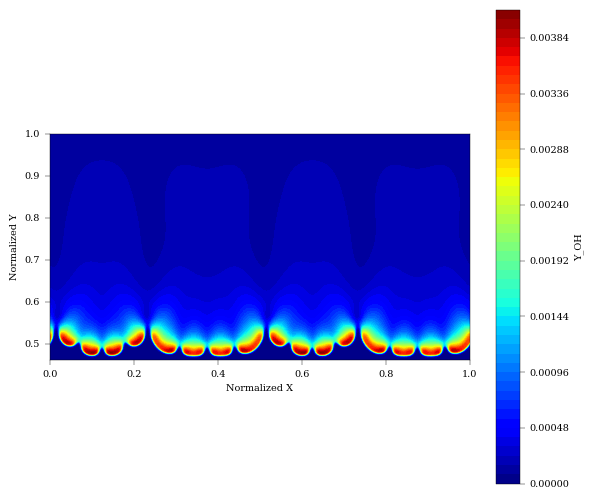

In [6]:
dns_dir = Path(DNS_path) / mechanism_name
# full file‐name inside that folder
csv_path = dns_dir / "DNS_reduced_data.csv"

# ───── 6) Read reduced CSV and re‐plot a contour ──────────
df2 = pd.read_csv(csv_path)

# choose which field to contour:
target = "Y_OH"  # or switch to "Y_N2" / "Y_H2" etc.

# rebuild grid from reduced data
xs = np.sort(df2["Normalized X"].unique())
ys = np.sort(df2["Normalized Y"].unique())
Xg, Yg = np.meshgrid(xs, ys)

# reshape and fill missing with 0 instead of NaN
Z = df2.pivot_table(
    index="Normalized Y",
    columns="Normalized X",
    values=target,
    fill_value=0
).values

plt.figure(figsize=(6,5))
cf = plt.contourf(Yg, Xg, Z, levels=50, cmap="jet")
plt.xlabel("Normalized X")
plt.ylabel("Normalized Y")
plt.colorbar(cf, label=target)
plt.gca().set_aspect("equal", "box")
plt.tight_layout()

outname = f"contour_reduced_{target}.png"
plt.savefig(outname, dpi=300)
print(f"Saved reduced-contour plot to {outname}")
plt.show()

🔍 Closest Normalized X to 0.5 is 0.4995112414467253
Saved line data to line_X0.500_Y_OH.csv
Saved line plot to line_X0.500_Y_OH.png


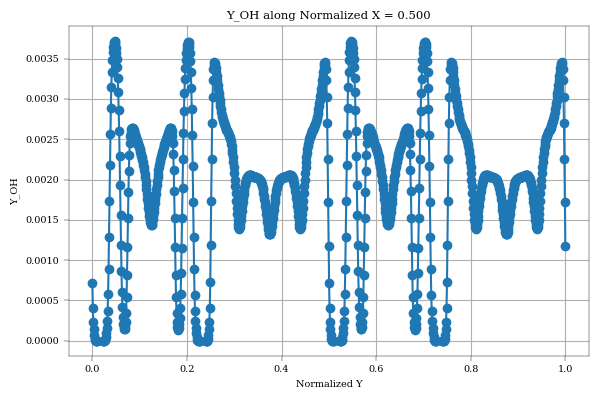

In [32]:
# ───── 7) Extract, save, and plot the line at Normalized X ≈ 0.5 ─────
x_target = 0.5

# find the unique Xs and pick the one closest to x_target
xs_unique = np.sort(df2["Normalized X"].unique())
closest_x = xs_unique[np.abs(xs_unique - x_target).argmin()]
print(f"🔍 Closest Normalized X to {x_target} is {closest_x}")

# filter for that X
df_line = df2[df2["Normalized X"] == closest_x]

if df_line.empty:
    print(f"⚠️ No data found at Normalized X = {closest_x}")
else:
    # sort by Y so the line plot is monotonic
    df_line = df_line.sort_values("Normalized Y")
    
    # ── save line data to CSV ──
    out_csv = f"line_X{closest_x:.3f}_{target}.csv"
    df_line.to_csv(out_csv, index=False)
    print(f"Saved line data to {out_csv}")
    
    # ── now plot it ──
    plt.figure(figsize=(6,4))
    plt.plot(
        df_line["Normalized Y"],
        df_line[target],
        marker='o', linestyle='-'
    )
    plt.xlabel("Normalized Y")
    plt.ylabel(target)
    plt.title(f"{target} along Normalized X = {closest_x:.3f}")
    plt.grid(True)
    plt.tight_layout()

    outname_line = f"line_X{closest_x:.3f}_{target}.png"
    plt.savefig(outname_line, dpi=300)
    print(f"Saved line plot to {outname_line}")
    plt.show()

#  Load SIM_results/DNS_dataset/NH3/plt12000_line/Otomo_32s213r/DNS_reduced_data.csv and figs/QSSA/SIM_results/DNS_dataset/NH3/plt12000_line/DNS_reduced_data/Otomo_32s213r/predicted_X.csv to compare 

Saved normalized HRR comparison plot to normalized_HRR_comparison.png


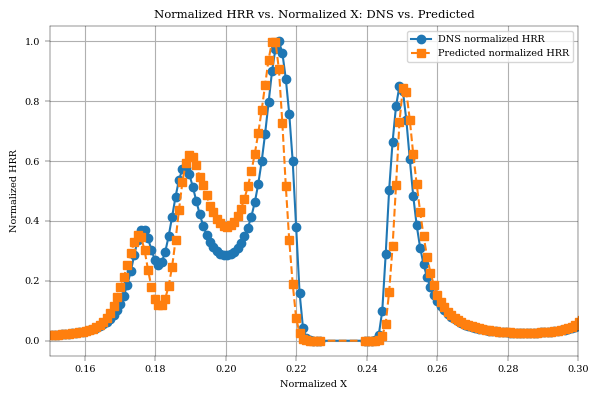

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# ───── 0) Which column holds your HRR? ──────────
target_value = "HRR"

# ───── 1) Define file paths ──────────
dns_csv  = Path("SIM_results/DNS_dataset/NH3/plt12000_line/Otomo_32s213r/DNS_reduced_data.csv")
pred_csv = Path("figs/QSSA/SIM_results/DNS_dataset/NH3/plt12000_line/DNS_reduced_data_OH/Otomo_32s213r/predicted_X.csv")

# ───── 2) Load data ──────────
df_dns  = pd.read_csv(dns_csv)
df_pred = pd.read_csv(pred_csv)

# ───── 3) Extract x and raw HRR ──────────
x_dns   = df_dns["Normalized Y"]
hrr_dns = df_dns[target_value]

x_pred   = df_pred["Normalized Y"]
hrr_pred = df_pred[target_value]

# ───── 4) Normalize each HRR series ──────────
hrr_dns_norm  = hrr_dns  / hrr_dns.max()
hrr_pred_norm = hrr_pred / hrr_pred.max()

# ───── 5) Plot normalized HRR ──────────
plt.figure(figsize=(6, 4))
plt.plot(
    x_dns,  hrr_dns_norm,
    marker='o', linestyle='-',
    label="DNS normalized HRR"
)
plt.plot(
    x_pred, hrr_pred_norm,
    marker='s', linestyle='--',
    label="Predicted normalized HRR"
)

plt.xlabel("Normalized X")
plt.ylabel("Normalized HRR")
plt.title("Normalized HRR vs. Normalized X: DNS vs. Predicted")
plt.legend()
plt.xlim(0.15, 0.3)
plt.grid(True)
plt.tight_layout()

# ───── 6) Save and show ──────────
outname = "normalized_HRR_comparison.png"
plt.savefig(outname, dpi=300)
print(f"Saved normalized HRR comparison plot to {outname}")
plt.show()

Saved combined plot to normalized_HRR_and_markers_A4.pdf


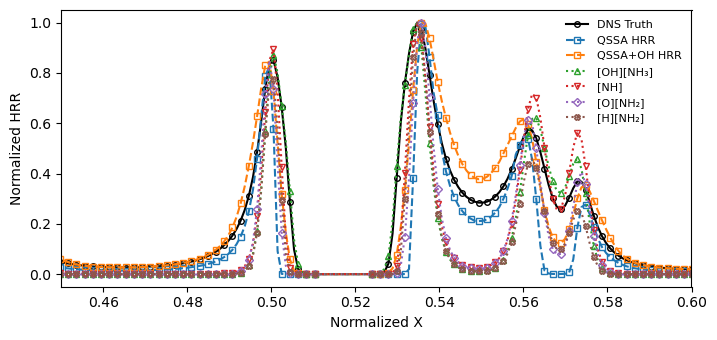

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# ───── 0) Which column holds your HRR? ──────────
target_value = "HRR"

# ───── 1) Define file paths ──────────
dns_csv           = Path("SIM_results/DNS_dataset/NH3/plt12000_line/Otomo_32s213r/DNS_reduced_data.csv")
pred_csv          = Path("figs/QSSA/SIM_results/DNS_dataset/NH3/plt12000_line/DNS_reduced_data/Otomo_32s213r/predicted_X.csv")
pred_with_OH_csv  = Path("figs/QSSA/SIM_results/DNS_dataset/NH3/plt12000_line/DNS_reduced_data_OH/Otomo_32s213r/predicted_X.csv")

# ───── 2) Load data ──────────
df_dns     = pd.read_csv(dns_csv)
df_pred    = pd.read_csv(pred_csv)
df_pred_oh = pd.read_csv(pred_with_OH_csv)

# ───── 3) Extract x and normalize HRR ──────────
x = df_dns["Normalized Y"]
hrr_dns_norm     = df_dns[target_value]     / df_dns[target_value].max()
hrr_pred_norm    = df_pred[target_value]    / df_pred[target_value].max()
hrr_pred_oh_norm = df_pred_oh[target_value] / df_pred_oh[target_value].max()

# ───── 4) Compute & normalize flame-marker signals ──────────
def norm(arr):
    return arr / arr.max()

markers_data = {
    "[OH][NH₃]": df_dns["Y_OH"] * df_dns["Y_NH3"],
    "[NH]":      df_dns["Y_NH"],
    "[O][NH₂]":  df_dns["Y_O"] * df_dns["Y_NH2"],
    "[H][NH₂]":  df_dns["Y_H"] * df_dns["Y_NH2"],
}
markers_norm = {label: norm(series) for label, series in markers_data.items()}

# ───── 5) Create A4‐sized figure spanning two columns ──────────
fig, ax = plt.subplots(figsize=(7.27, 3.5))  # width x height in inches

tab10 = plt.get_cmap("tab10").colors

# DNS Truth (black, hollow circles)
ax.plot(
    x, hrr_dns_norm,
    marker='o', linestyle='-',
    color='black', label="DNS Truth",
    markerfacecolor='none', markeredgecolor='black',
    markersize=4, markevery=2
)

# QSSA HRR (hollow squares)
ax.plot(
    x, hrr_pred_norm,
    marker='s', linestyle='--',
    color=tab10[0], label="QSSA HRR",
    markerfacecolor='none', markeredgecolor=tab10[0],
    markersize=4, markevery=2
)

# QSSA + OH HRR (hollow squares)
ax.plot(
    x, hrr_pred_oh_norm,
    marker='s', linestyle='--',
    color=tab10[1], label="QSSA+OH HRR",
    markerfacecolor='none', markeredgecolor=tab10[1],
    markersize=4, markevery=2
)

# Flame-marker curves (hollow markers, different symbols/colors)
marker_styles = ["^", "v", "D", "X", "p"]
for (label, series), mk, col in zip(markers_norm.items(), marker_styles, tab10[2:]):
    ax.plot(
        x, series,
        marker=mk, linestyle=':',
        color=col, label=label,
        markerfacecolor='none', markeredgecolor=col,
        markersize=4, markevery=2
    )

ax.set_xlabel("Normalized X")
ax.set_ylabel("Normalized HRR")
ax.set_xlim(0.45, 0.6)
ax.legend(loc="upper right", fontsize=8, frameon=False)

fig.tight_layout()

# ───── 6) Save as high-res PDF ──────────
outname = "normalized_HRR_and_markers_A4.pdf"
fig.savefig(outname, dpi=300, format="pdf", bbox_inches="tight")
print(f"Saved combined plot to {outname}")
plt.show()

Saved combined contour plot to contour_HRR_comparison.png


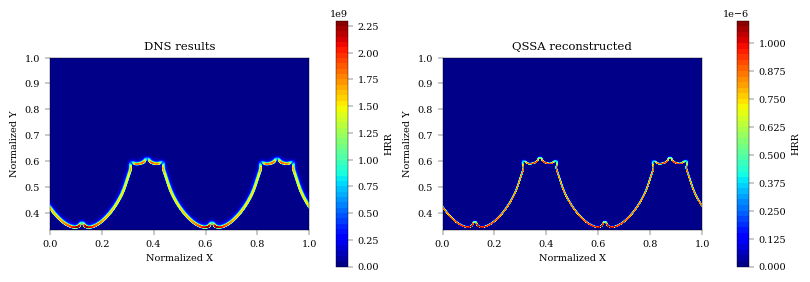

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ───── 6) Read back CSVs ──────────────────────────────────────
df1 = pd.read_csv("/data/ZhuXu/Cantera/NeuralRecon/SIM_results/DNS_dataset/NH3/plt17000/Otomo_32s213r/DNS_reduced_data.csv")
df2 = pd.read_csv("/data/ZhuXu/Cantera/NeuralRecon/figs/QSSA/SIM_results/DNS_dataset/NH3/plt17000/DNS_reduced_data/Otomo_32s213r/predicted_X.csv")

# choose which field to contour:
target = "HRR"   # e.g. "temp" or "Y(OH)" or any entry from your fields

# rebuild grid
xs = np.sort(df1["Normalized X"].unique())
ys = np.sort(df1["Normalized Y"].unique())
Xg, Yg = np.meshgrid(xs, ys)

# prepare Z arrays
Z1 = df1.pivot_table(
    index="Normalized Y",
    columns="Normalized X",
    values=target,
    fill_value=0
).values

Z2 = df2.pivot_table(
    index="Normalized Y",
    columns="Normalized X",
    values="Y_NH",
    # values=target,
    
    fill_value=0
).values

# ───── Shared colorbar option ─────────────────────────────────
share_cbar = False

fig, axes = plt.subplots(1, 2, figsize=(8, 5), constrained_layout=True)

if share_cbar:
    # compute global range
    vmin = min(Z1.min(), Z2.min())
    vmax = max(Z1.max(), Z2.max())
    # both contour calls use same vmin/vmax
    cf0 = axes[0].contourf(Yg, Xg, Z1, levels=50, cmap="jet", vmin=vmin, vmax=vmax)
    cf1 = axes[1].contourf(Yg, Xg, Z2, levels=50, cmap="jet", vmin=vmin, vmax=vmax)

    # single shared bar, shrunk to 80% height
    cbar = fig.colorbar(cf0, ax=axes.tolist(), label=target, shrink=0.5)
else:
    cf0 = axes[0].contourf(Yg, Xg, Z1, levels=50, cmap="jet")
    fig.colorbar(cf0, ax=axes[0], label=target, shrink=0.5)

    cf1 = axes[1].contourf(Yg, Xg, Z2, levels=50, cmap="jet")
    fig.colorbar(cf1, ax=axes[1], label=target, shrink=0.5)

# finalize each subplot
titles = ["DNS results", "QSSA reconstructed"]
for ax, title in zip(axes, titles):
    ax.set_title(title)
    ax.set_xlabel("Normalized X")
    ax.set_ylabel("Normalized Y")
    ax.set_aspect("equal", "box")

# Save and show
outname = f"contour_{target}_comparison.png"
plt.savefig(outname, dpi=300)
print(f"Saved combined contour plot to {outname}")
plt.show()


Using row j=409, y=0.400 (closest to 0.4)
0.0000   298
0.0010   298
0.0020   298
0.0029   298
0.0039   298
0.0049   298
0.0059   298
0.0068   298
0.0078   298
0.0088   298
0.0098   298
0.0108   298
0.0117   298
0.0127   298
0.0137   298
0.0147   298
0.0156   298
0.0166   298
0.0176   298
0.0186   298
0.0196   298
0.0205   298
0.0215   298
0.0225   298
0.0235   298
0.0244   298
0.0254   298
0.0264   298
0.0274   298
0.0283   298
0.0293   298
0.0303   298
0.0313   298
0.0323   298
0.0332   298
0.0342   298
0.0352   298
0.0362   298
0.0371   298
0.0381   298
0.0391   298
0.0401   298
0.0411   298
0.0420   298
0.0430   298
0.0440   298
0.0450   298
0.0459   298
0.0469   298
0.0479   298
0.0489   298
0.0499   298
0.0508   298
0.0518   298
0.0528   298
0.0538   298
0.0547   298
0.0557   298
0.0567   298
0.0577   298
0.0587   298
0.0596   298
0.0606   298
0.0616   298
0.0626   298
0.0635   298
0.0645   298
0.0655   298
0.0665   298
0.0674   298
0.0684   298
0.0694   298
0.0704   298
0.0714   

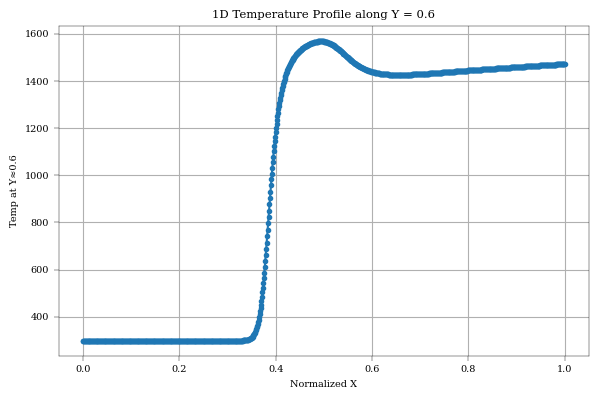

In [5]:
# ───── existing code up to building X,Y,T ────────────────────
x = np.linspace(0, 1, Nx)
y = np.linspace(0, 1, Ny)
X, Y = np.meshgrid(x, y)
# T has shape (Ny, Nx)

# ───── extract line at Y = 0.6 ───────────────────────────────
y_target = 0.4
# find the index j whose y[j] is closest to 0.6
j = np.argmin(np.abs(y - y_target))
print(f"Using row j={j}, y={y[j]:.3f} (closest to {y_target})")

# extract the temperature along that row
T_line = T[j, :]  # shape (Nx,)

# x is your horizontal coordinate (length Nx)
# T_line is the temperature along y≈0.6

# ───── optionally, save or print the (x, T_line) pairs ───────
for xi, Ti in zip(x, T_line):
    print(f"{xi:.4f}   {Ti:.6g}")

# ───── or plot the profile ───────────────────────────────────
plt.figure(figsize=(6,4))
plt.plot(x, T_line, '-o', markersize=3)
plt.xlabel("Normalized X")
plt.ylabel("Temp at Y≈0.6")
plt.title("1D Temperature Profile along Y = 0.6")
plt.grid(True)
plt.tight_layout()
plt.savefig("temp_profile_Y06.png", dpi=300)
print("Saved line profile to temp_profile_Y06.png")
plt.show()